# Atopy Grading - Test (Ensemble & soft-label)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import time
import h5py
import math
from random import randint, choice
import glob
import cv2

from scipy.ndimage import rotate
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight

import keras
from keras.models import Model
from keras.layers import Dense, Activation, Input, Concatenate, Dropout, BatchNormalization, ZeroPadding2D


import tensorflow as tf
from keras import backend as K

print(tf.__version__)
print(keras.__version__)

K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


1.15.0
2.3.1


['/job:localhost/replica:0/task:0/device:GPU:0']

## Hyperparameter

In [ ]:
##################################################
Evaluator_Test = 'soft-label' ## 
atopy_type = '7.IGA' ##
# 1.Erythema
# 2.Edema_Papule 
# 3.Excoriation 
# 4.Lichenification
# 5.Oozing_Crusting
# 6.Dryness
# 7.IGA

normalize = 'on' ##
augment = 'on' ##

input_shape = [400,400,3] 

option = '_Aug_'
model_names = ['InceptionResNetV2']
##################################################

test_path = '../Dataset/Image_re/Test/' + Evaluator_Test + '/' + atopy_type + '/'
ext_path = '../Dataset/Image_re/ExtraVal/' + Evaluator_Test + '/' + atopy_type + '/'


save_name1 = model_names[0] + '_' + 'A' + '_' + atopy_type + option +'.h5'
save_name2 = model_names[0] + '_' + 'B' + '_' + atopy_type + option +'.h5'
save_name3 = model_names[0] + '_' + 'C' + '_' + atopy_type + option +'.h5'
save_name4 = model_names[0] + '_' + 'D' + '_' + atopy_type + option +'.h5'
save_name5 = model_names[0] + '_' + 'E' + '_' + atopy_type + option +'.h5'
    

model_path1 = '../Result/model/' + atopy_type + '/' + save_name1 
model_path2 = '../Result/model/' + atopy_type + '/' + save_name2
model_path3 = '../Result/model/' + atopy_type + '/' + save_name3
model_path4 = '../Result/model/' + atopy_type + '/' + save_name4
model_path5 = '../Result/model/' + atopy_type + '/' + save_name5 

## Load Dataset

### Test

In [3]:
""" Test """
grade0_te_path = glob.glob(test_path + 'Grade0/*.jpg')
grade1_te_path = glob.glob(test_path + 'Grade1/*.jpg')
grade2_te_path = glob.glob(test_path + 'Grade2/*.jpg')
grade3_te_path = glob.glob(test_path + 'Grade3/*.jpg')

grade0_te_list, grade1_te_list, grade2_te_list, grade3_te_list = [], [], [], []
label0_te_list, label1_te_list, label2_te_list, label3_te_list = [], [], [], []

for i, g0 in enumerate(grade0_te_path):
    img0 = cv2.imread(g0)
    ## resize
    image0 = cv2.resize(img0, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image0 = image0 / 255
    grade0_te_list.append(image0)
    if Evaluator_Test != 'Soft':
        label0_te_list.append(0)
    
for i, g1 in enumerate(grade1_te_path):
    img1 = cv2.imread(g1)
    ## resize
    image1 = cv2.resize(img1, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image1 = image1 / 255
    grade1_te_list.append(image1)   
    if Evaluator_Test != 'Soft':
        label1_te_list.append(1)

for i, g2 in enumerate(grade2_te_path):
    img2 = cv2.imread(g2)
    ## resize
    image2 = cv2.resize(img2, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image2 = image2 / 255
    grade2_te_list.append(image2)  
    if Evaluator_Test != 'Soft':  
        label2_te_list.append(2)
        
for i, g3 in enumerate(grade3_te_path):
    img3 = cv2.imread(g3)
    ## resize
    image3 = cv2.resize(img3, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image3 = image3 / 255
    grade3_te_list.append(image3)  
    if Evaluator_Test != 'Soft':  
        label3_te_list.append(3)

print('\n')
print(np.shape(grade0_te_list))
print(np.shape(grade1_te_list))
print(np.shape(grade2_te_list))
print(np.shape(grade3_te_list))

print('\n')
print(len(label0_te_list))
print(len(label1_te_list))
print(len(label2_te_list))
print(len(label3_te_list))
print("** Process Done ***")



(299, 400, 400, 3)
(676, 400, 400, 3)
(477, 400, 400, 3)
(114, 400, 400, 3)


299
676
477
114
** Process Done ***


### External Validation

In [4]:
""" External Validation """
grade0_ext_path = glob.glob(ext_path + 'Grade0/*.jpg')
grade1_ext_path = glob.glob(ext_path + 'Grade1/*.jpg')
grade2_ext_path = glob.glob(ext_path + 'Grade2/*.jpg')
grade3_ext_path = glob.glob(ext_path + 'Grade3/*.jpg')

grade0_ext_list, grade1_ext_list, grade2_ext_list, grade3_ext_list = [], [], [], []
label0_ext_list, label1_ext_list, label2_ext_list, label3_ext_list = [], [], [], []

for i, g0 in enumerate(grade0_ext_path):
    img0 = cv2.imread(g0)
    ## resize
    image0 = cv2.resize(img0, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image0 = image0 / 255
    grade0_ext_list.append(image0)
    if Evaluator_Test != 'Soft':
        label0_ext_list.append(0)
    
for i, g1 in enumerate(grade1_ext_path):
    img1 = cv2.imread(g1)
    ## resize
    image1 = cv2.resize(img1, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image1 = image1 / 255
    grade1_ext_list.append(image1)   
    if Evaluator_Test != 'Soft':
        label1_ext_list.append(1)

for i, g2 in enumerate(grade2_ext_path):
    img2 = cv2.imread(g2)
    ## resize
    image2 = cv2.resize(img2, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image2 = image2 / 255
    grade2_ext_list.append(image2)  
    if Evaluator_Test != 'Soft':  
        label2_ext_list.append(2)
        
for i, g3 in enumerate(grade3_ext_path):
    img3 = cv2.imread(g3)
    ## resize
    image3 = cv2.resize(img3, dsize=(input_shape[0], input_shape[1]), interpolation = cv2.INTER_CUBIC)
    if normalize == 'on':
        image3 = image3 / 255
    grade3_ext_list.append(image3)  
    if Evaluator_Test != 'Soft':  
        label3_ext_list.append(3)
        
        
print('\n')
print(np.shape(grade0_ext_list))
print(np.shape(grade1_ext_list))
print(np.shape(grade2_ext_list))
print(np.shape(grade3_ext_list))

print('\n')
print(len(label0_ext_list))
print(len(label1_ext_list))
print(len(label2_ext_list))
print(len(label3_ext_list))
print("** Process Done ***")



(157, 400, 400, 3)
(440, 400, 400, 3)
(318, 400, 400, 3)
(88, 400, 400, 3)


157
440
318
88
** Process Done ***


## Concatenation for Dataset Preparation

In [5]:
""" Test """
X_test = np.concatenate((grade0_te_list, grade1_te_list, grade2_te_list, grade3_te_list), axis = 0)
y_test_ = np.concatenate((label0_te_list, label1_te_list, label2_te_list, label3_te_list), axis = 0)
# X_test = np.concatenate((grade0_te_list, grade1_te_list, grade3_te_list), axis = 0)
# y_test_ = np.concatenate((label0_te_list, label1_te_list, label3_te_list), axis = 0)

del grade0_te_list, grade1_te_list, grade2_te_list, grade3_te_list
del label0_te_list, label1_te_list, label2_te_list, label3_te_list


""" One-hot encodding """
y_test = keras.utils.to_categorical(y_test_,4) 


print(np.shape(X_test))
print(np.shape(y_test))

(1566, 400, 400, 3)
(1566, 4)


In [6]:
""" External Validation """
X_ext = np.concatenate((grade0_ext_list, grade1_ext_list, grade2_ext_list, grade3_ext_list), axis = 0)
y_ext_ = np.concatenate((label0_ext_list, label1_ext_list, label2_ext_list, label3_ext_list), axis = 0)

del grade0_ext_list, grade1_ext_list, grade2_ext_list, grade3_ext_list
del label0_ext_list, label1_ext_list, label2_ext_list, label3_ext_list


""" One-hot encodding """
y_ext = keras.utils.to_categorical(y_ext_,4) 


print(np.shape(X_ext))
print(np.shape(y_ext))

(1003, 400, 400, 3)
(1003, 4)


## Model Prediction

In [7]:
import keras.backend.tensorflow_backend as K

""" Load Trained Model """
trained_model1 = keras.models.load_model(model_path1) 
trained_model2 = keras.models.load_model(model_path2) 
trained_model3 = keras.models.load_model(model_path3) 
trained_model4 = keras.models.load_model(model_path4) 
trained_model5 = keras.models.load_model(model_path5) 

print("*** Load Trained Model Done ***")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



*** Load Trained Model Done ***


In [8]:
""" Test """
pred_test_A = trained_model1.predict(X_test, batch_size=1, verbose=0)
pred_test_B = trained_model2.predict(X_test, batch_size=1, verbose=0)
pred_test_C = trained_model3.predict(X_test, batch_size=1, verbose=0)
pred_test_D = trained_model4.predict(X_test, batch_size=1, verbose=0)
pred_test_E = trained_model5.predict(X_test, batch_size=1, verbose=0)


""" Ext """
pred_ext_A = trained_model1.predict(X_ext, batch_size=1, verbose=0)
pred_ext_B = trained_model2.predict(X_ext, batch_size=1, verbose=0) 
pred_ext_C = trained_model3.predict(X_ext, batch_size=1, verbose=0)
pred_ext_D = trained_model4.predict(X_ext, batch_size=1, verbose=0)
pred_ext_E = trained_model5.predict(X_ext, batch_size=1, verbose=0) 

print("\n*** Prediction Done ***")


*** Prediction Done ***


## Soft-label

In [9]:
def soft_label(listA, listB, listC, listD, listE):
    soft0 = (listA[0] + listB[0] + listC[0] + listD[0] + listE[0])/5
    soft1 = (listA[1] + listB[1] + listC[1] + listD[1] + listE[1])/5
    soft2 = (listA[2] + listB[2] + listC[2] + listD[2] + listE[2])/5
    soft3 = (listA[3] + listB[3] + listC[3] + listD[3] + listE[3])/5
        
    return soft0, soft1, soft2, soft3

""" Test """
soft_pred_test_list, soft_prob_test_list = [], []
for i in range(len(pred_test_A)):
    test_A = pred_test_A[i]
    test_B = pred_test_B[i]
    test_C = pred_test_C[i]
    test_D = pred_test_D[i]
    test_E = pred_test_E[i]

    soft_test0, soft_test1, soft_test2, soft_test3 = soft_label(test_A, test_B, test_C, test_D, test_E)
    soft_test_list = [soft_test0, soft_test1, soft_test2, soft_test3]
    soft_test_pred = np.argmax(soft_test_list)
    
    soft_pred_test_list.append(soft_test_pred)
    soft_prob_test_list.append(soft_test_list)
    
soft_prob_test_array = np.array(soft_prob_test_list)


""" Ext """
soft_pred_ext_list, soft_prob_ext_list = [], []
for i in range(len(pred_ext_A)):
    ext_A = pred_ext_A[i]
    ext_B = pred_ext_B[i]
    ext_C = pred_ext_C[i]
    ext_D = pred_ext_D[i]
    ext_E = pred_ext_E[i]

    soft_ext0, soft_ext1, soft_ext2, soft_ext3 = soft_label(ext_A, ext_B, ext_C, ext_D, ext_E)
    soft_ext_list = [soft_ext0, soft_ext1, soft_ext2, soft_ext3]
    soft_ext_pred = np.argmax(soft_ext_list)
    
    soft_pred_ext_list.append(soft_ext_pred)
    soft_prob_ext_list.append(soft_ext_list)
    
soft_prob_ext_array = np.array(soft_prob_ext_list)

## Evaluation

In [10]:
# https://link.medium.com/dlmxbyUxFW

import itertools

def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

### Confusion Matrix

<Figure size 432x288 with 0 Axes>

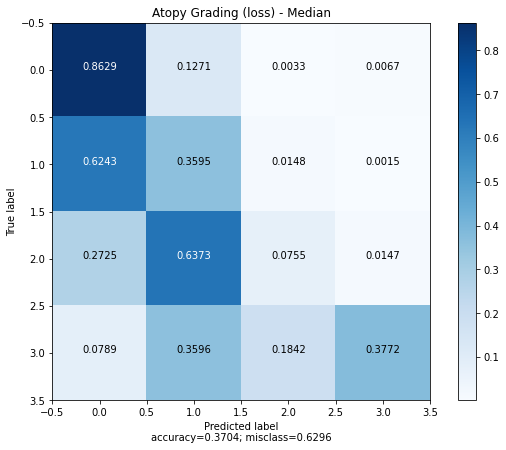

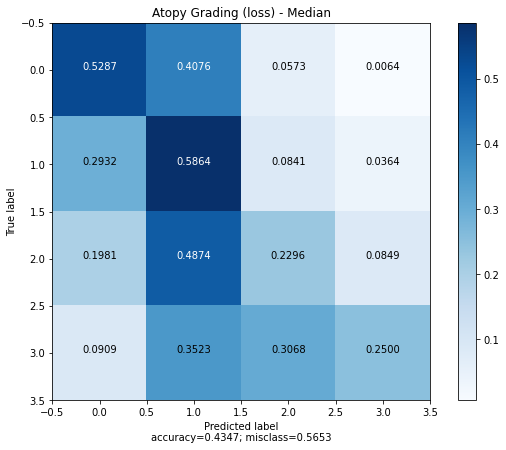

Accuracy Test (loss):  0.37037037037037035
Accuracy Ext (loss):  0.43469591226321036


In [11]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score


""" one-hot decoding"""
X_test_decode = np.argmax(soft_prob_test_array, axis=1)
X_ext_decode = np.argmax(soft_prob_ext_array, axis=1)
y_test_decode = np.argmax(y_test, axis=1)
y_ext_decode = np.argmax(y_ext, axis=1)


""" Confusion Matrix """
cnf_matrix_test = confusion_matrix(y_test_decode, X_test_decode)
cnf_matrix_ext = confusion_matrix(y_ext_decode, X_ext_decode)

np.set_printoptions(precision=2)
plt.figure()


plot_confusion_matrix(cnf_matrix_test, labels=['grade0', 'grade1', 'grade2', 'grade3'],  title='Atopy Grading (test) - ' + Evaluator_Test), 'micro'
plot_confusion_matrix(cnf_matrix_ext, labels=['grade0', 'grade1', 'grade2', 'grade3'],  title='Atopy Grading (ext) - ' + Evaluator_Test), 'micro'


acc_test = accuracy_score(y_test_decode, X_test_decode)
acc_ext = accuracy_score(y_ext_decode, X_ext_decode)

print("Accuracy Test : ", acc_test)
print("Accuracy Ext : ", acc_ext)

### Metrics

In [12]:
from sklearn.metrics import precision_score, recall_score, f1_score 

""" Precision """
precision_macro_test = precision_score(y_test_decode, X_test_decode, average='macro')
precision_macro_ext = precision_score(y_ext_decode, X_ext_decode, average='macro')


""" Recall """
recall_macro_test = recall_score(y_test_decode, X_test_decode, average='macro')
recall_macro_ext = recall_score(y_ext_decode, X_ext_decode, average='macro')


""" F1-score """
F1_macro_test = f1_score(y_test_decode, X_test_decode, average='macro')
F1_macro_ext = f1_score(y_ext_decode, X_ext_decode, average='macro')

In [13]:
""" Test """
FP = cnf_matrix_test.sum(axis=0) - np.diag(cnf_matrix_test)  
FN = cnf_matrix_test.sum(axis=1) - np.diag(cnf_matrix_test)
TP = np.diag(cnf_matrix_test)
TN = cnf_matrix_test.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR_test = TP/(TP+FN)
# Specificity or true negative rate
TNR_test = TN/(TN+FP) 


""" Ext """
FP = cnf_matrix_ext.sum(axis=0) - np.diag(cnf_matrix_ext)  
FN = cnf_matrix_ext.sum(axis=1) - np.diag(cnf_matrix_ext)
TP = np.diag(cnf_matrix_ext)
TN = cnf_matrix_ext.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR_ext = TP/(TP+FN)
# Specificity or true negative rate
TNR_ext = TN/(TN+FP) 

### ROC - Test

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


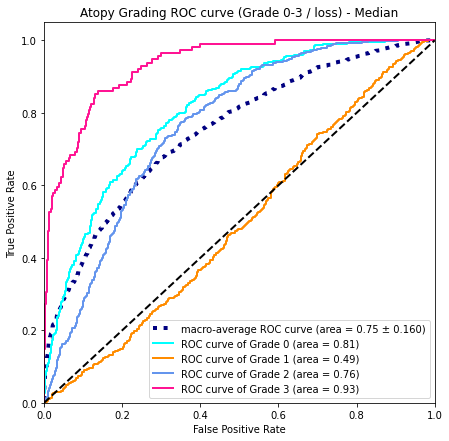

In [14]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

####################################
pred = soft_prob_test_array
####################################

num_classes = 4
fpr = dict()
tpr = dict()
roc_auc_test = dict()
for i in range(num_classes):
#     if i !=2:
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], pred[:, i])
    roc_auc_test[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), pred.ravel())
# roc_auc_test["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))


# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
#     if i !=2:
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes ##

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc_test["macro"] = auc(fpr["macro"], tpr["macro"])

auc_std_test = round(np.std([roc_auc_test[0], roc_auc_test[1], roc_auc_test[2], roc_auc_test[3]]), 2)    
# auc_std_test = round(np.std([roc_auc_test[0], roc_auc_test[1], roc_auc_test[3]]), 2)  

# Plot all ROC curves
plt.figure(figsize = [7,7])
lw = 2
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc_test["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f} \u00B1 {1:0.3f})'
               ''.format(roc_auc_test["macro"], auc_std_test),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(num_classes), colors):
#     if i !=2:
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of Grade {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_test[i]))


plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Atopy Grading ROC curve (Grade 0-3) - ' + Evaluator_Test)
plt.legend(loc="lower right")
plt.show()

### ROC - Ext

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


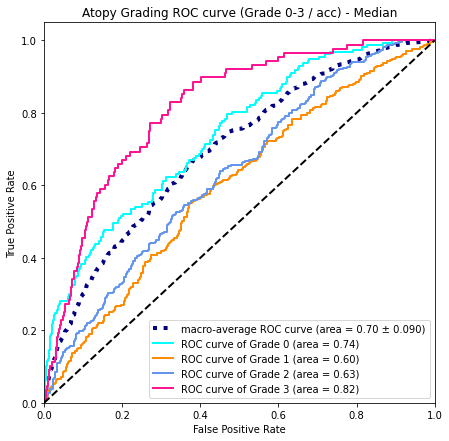

In [15]:
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

####################################
pred = soft_prob_ext_array
####################################

    
num_classes = 4
fpr = dict()
tpr = dict()
roc_auc_ext = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_ext[:, i], pred[:, i])
    roc_auc_ext[i] = auc(fpr[i], tpr[i])


# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_ext.ravel(), pred.ravel())
roc_auc_ext["micro"] = auc(fpr["micro"], tpr["micro"])


# Compute macro-average ROC curve and ROC area
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))


# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= num_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc_ext["macro"] = auc(fpr["macro"], tpr["macro"])

auc_std_ext = round(np.std([roc_auc_ext[0], roc_auc_ext[1], roc_auc_ext[2], roc_auc_ext[3]]), 2)

# Plot all ROC curves
plt.figure(figsize = [7,7])
lw = 2
# plt.plot(fpr["micro"], tpr["micro"],
#          label='micro-average ROC curve (area = {0:0.2f})'
#                ''.format(roc_auc_ext["micro"]),
#          color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f} \u00B1 {1:0.3f})'
               ''.format(roc_auc_ext["macro"], auc_std_ext),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'deeppink'])
for i, color in zip(range(num_classes), colors):
#     if i !=2:
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of Grade {0} (area = {1:0.2f})'
             ''.format(i, roc_auc_ext[i]))



plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Atopy Grading ROC curve (Grade 0-3 / acc) - ' + Evaluator_Test)
plt.legend(loc="lower right")
plt.show()

## Total Metrics

### Test

In [18]:
print("AUC (macro), Accuracy, Sensitivity, Specificity, F1(macro)")
print(round(roc_auc_test["macro"],3), '+-' + str(auc_std_test), round(acc_test, 3), round(np.average(TPR_test),3), round(np.average(TNR_test),3), round(F1_macro_test, 3))

*** Loss ***
AUC (macro), Accuracy, Sensitivity, Specificity, F1(macro)
0.899 +-0.04 0.786 0.778 0.919 0.755


### Ext

In [19]:
print("AUC (macro), Accuracy, Sensitivity, Specificity, F1(macro)")
print(round(roc_auc_ext["macro"],3), '+-' + str(auc_std_ext), round(acc_ext, 3),  round(np.average(TPR_ext),3), round(np.average(TNR_ext),3), round(F1_macro_ext, 3))

*** Loss ***
AUC (macro), Accuracy, Sensitivity, Specificity, F1(macro)
0.927 +-0.07 0.714 0.81 0.895 0.699
